In [1]:
import evolml
import evolml.models
import metaheuristic_designer as mhd
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

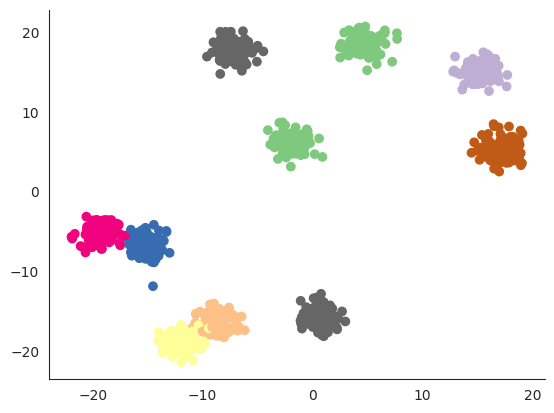

In [2]:
k = 10
X, y = make_blobs(n_samples=1000, n_features=2, centers=k, center_box=(-20,20))
plt.scatter(X[:,0], X[:,1], c=y, cmap="Accent")
sns.despine()
plt.show()

# Greedy K-Medioids

In [3]:
cluster_alg = evolml.models.GreedyKMedoids(k=k, pcross=0.9, pmut=0.1, pop_size=100, stop_cond="time_limit", time_limit=60, verbose=True)
cluster_alg.fit(X)

Initializing optimization of Kmedoids centroids using HillClimb
---------------------------------------------------------------

Optimizing Kmedoids centroids using HillClimb:
	Real time Spent: 0.04 s
	CPU time Spent:  0.04 s
	Generation: 0
	Best fitness: 0.4284103241867453
	Evaluations of fitness: 1


Optimizing Kmedoids centroids using HillClimb:
	Real time Spent: 1.01 s
	CPU time Spent:  1.01 s
	Generation: 79
	Best fitness: 0.7326760794662082
	Evaluations of fitness: 80


Optimizing Kmedoids centroids using HillClimb:
	Real time Spent: 2.02 s
	CPU time Spent:  2.02 s
	Generation: 154
	Best fitness: 0.7357008001726596
	Evaluations of fitness: 155


Optimizing Kmedoids centroids using HillClimb:
	Real time Spent: 3.02 s
	CPU time Spent:  3.02 s
	Generation: 234
	Best fitness: 0.7357008001726596
	Evaluations of fitness: 235


Optimizing Kmedoids centroids using HillClimb:
	Real time Spent: 4.04 s
	CPU time Spent:  4.04 s
	Generation: 316
	Best fitness: 0.7357008001726596
	Evaluations 

GreedyKMedoids(k=10)

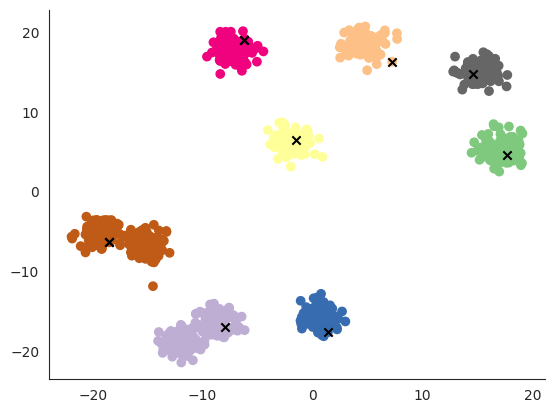

In [4]:
labels = cluster_alg.predict(X) 
plt.scatter(X[:,0], X[:,1], c=labels, cmap="Accent")
plt.scatter(cluster_alg.medioids[:, 0], cluster_alg.medioids[:, 1], marker="x", color="black")
sns.despine()
plt.show()

# Genetic K-Medioids

In [5]:
cluster_alg = evolml.models.GeneticKMedoids(k=k, pcross=0.9, pmut=0.1, pop_size=100, stop_cond="time_limit", time_limit=60, verbose=True)
cluster_alg.fit(X)

Initializing optimization of Kmedoids centroids using GA
--------------------------------------------------------

Optimizing Kmedoids centroids using GA:
	Real time Spent: 1.29 s
	CPU time Spent:  1.29 s
	Generation: 0
	Best fitness: 0.716073794927297
	Evaluations of fitness: 100

	diversity: 2.69e+02

Optimizing Kmedoids centroids using GA:
	Real time Spent: 2.7 s
	CPU time Spent:  2.7 s
	Generation: 1
	Best fitness: 0.716073794927297
	Evaluations of fitness: 199

	diversity: 2.78e+02

Optimizing Kmedoids centroids using GA:
	Real time Spent: 3.89 s
	CPU time Spent:  3.89 s
	Generation: 2
	Best fitness: 0.716073794927297
	Evaluations of fitness: 298

	diversity: 2.79e+02

Optimizing Kmedoids centroids using GA:
	Real time Spent: 5.1 s
	CPU time Spent:  5.1 s
	Generation: 3
	Best fitness: 0.73316334788187
	Evaluations of fitness: 397

	diversity: 2.8e+02

Optimizing Kmedoids centroids using GA:
	Real time Spent: 6.28 s
	CPU time Spent:  6.28 s
	Generation: 4
	Best fitness: 0.740103855

GeneticKMedoids(k=10)

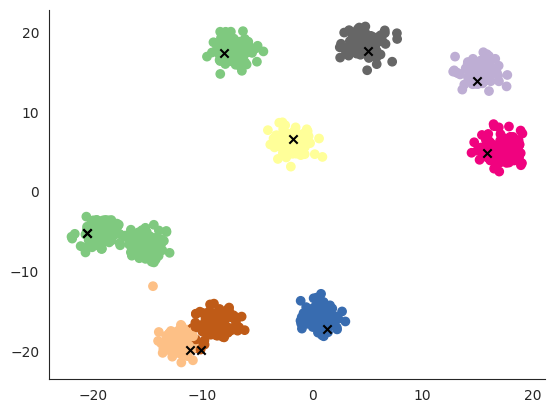

In [6]:
labels = cluster_alg.predict(X) 
plt.scatter(X[:,0], X[:,1], c=labels, cmap="Accent")
plt.scatter(cluster_alg.medioids[:, 0], cluster_alg.medioids[:, 1], marker="x", color="black")
sns.despine()
plt.show()

### comparing real labels with k-medioids labels

In [7]:
pairs = []
pairs_idx = []
centroids = np.asarray([X[y==i].mean(axis=0) for i in range(k)])
medioids = cluster_alg.medioids
medioids_aux = medioids.copy()
for idx, val in enumerate(centroids):
    nearest = np.argmin(((val - medioids_aux)**2).sum(axis=1))
    chosen_m = medioids_aux[nearest]
    medioids_aux = np.delete(medioids_aux, nearest, axis=0)
    pairs += [(val, chosen_m)]
pairs
label_map = dict([(np.where(med[0] == medioids[:,0])[0][0], idx) for idx, (cent, med) in enumerate(pairs)])
true_labels = np.asarray([label_map[i] for i in labels])
print(y)
print(true_labels)

accuracy_score(y, true_labels)

[1 9 1 3 0 8 5 4 6 5 8 1 8 1 1 9 9 0 5 7 2 7 3 5 4 6 5 3 4 4 7 4 8 0 4 3 1
 3 4 8 5 9 3 9 0 4 1 8 8 5 1 6 5 5 0 3 6 7 3 3 1 3 7 3 4 7 6 9 6 2 9 6 6 1
 5 2 1 5 5 5 8 7 1 9 8 2 5 4 3 8 9 7 0 3 3 2 3 6 5 8 8 8 9 6 0 0 3 5 0 2 6
 7 7 8 7 0 2 4 7 5 5 8 3 3 1 4 4 1 2 3 3 0 9 4 8 9 9 9 9 3 9 6 4 5 0 0 8 1
 6 5 5 3 2 6 6 9 2 6 0 1 4 9 7 2 6 8 8 7 3 9 6 5 0 8 0 6 1 2 5 3 4 4 1 7 2
 8 0 6 0 9 7 7 3 6 8 0 5 3 7 5 0 6 5 9 5 5 4 9 8 3 7 2 8 9 3 2 4 0 7 7 3 0
 0 0 7 7 4 5 7 9 0 9 0 4 8 7 6 4 0 6 0 1 9 2 1 6 5 5 4 2 0 0 5 8 8 5 9 7 8
 9 8 7 0 2 0 8 0 8 7 4 6 1 7 1 6 2 3 6 0 0 8 9 2 9 8 4 4 3 5 9 0 2 0 7 5 9
 0 6 2 8 5 6 9 1 6 9 6 4 8 7 7 5 5 7 8 5 3 4 9 6 9 7 7 1 7 3 7 3 4 9 3 6 5
 9 8 5 7 7 4 0 2 0 4 3 2 1 8 8 4 1 3 8 9 3 4 4 6 2 5 4 4 7 0 2 4 2 6 8 2 9
 0 1 1 7 4 4 4 2 3 9 0 2 6 8 4 7 5 5 7 8 0 3 9 2 2 4 9 0 5 1 7 5 7 2 5 1 4
 7 4 9 1 9 6 4 7 4 8 9 7 4 1 8 4 8 6 2 7 4 7 4 2 4 7 6 3 2 2 6 0 7 4 2 2 3
 9 5 9 9 9 2 4 8 2 3 9 6 4 2 2 1 9 6 7 1 3 7 1 0 0 4 1 6 3 9 8 1 0 8 3 2 5
 0 8 2 2 3 1 1 6 3 2 9 9 

0.885